<a href="https://colab.research.google.com/github/hcgalvantech/proyecto_integrado_2a/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas de nivel secundario
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "María", "Pedro", "Laura", "Carlos", "Ana", "Luis", "Marta", "Diego", "Sofia"]
  apellidos = ["Gómez", "Pérez", "Rodríguez", "Fernández", "López", "García", "Martínez", "Sánchez", "González", "Romero"]
  return random.choice(nombres) + " " + random.choice(apellidos)

# Función para generar un DNI aleatorio
def generar_dni():
  return random.randint(10000000, 99999999)

# Generar datos para el DataFrame
data = []
for _ in range(100):
  nombre_apellido = generar_nombre_apellido()
  dni = generar_dni()
  materia = random.choice(materias)
  nota_1er_trimestre = round(random.uniform(1, 10), 1)
  nota_2do_trimestre = round(random.uniform(1, 10), 1)
  nota_3er_trimestre = round(random.uniform(1, 10), 1)
  faltas = random.randint(0, 20)
  data.append([nombre_apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])


# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre y Apellido", "DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a Clases"])

# Mostrar el DataFrame
df

,Nombre y Apellido,DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,Ana Rodríguez,17886217,Geografía,6.7,6.3,5.4,3
1,Luis Pérez,94721890,Química,3.1,2.4,1.8,2
2,Diego Sánchez,15808118,Música,7.0,9.7,2.2,5
3,Sofia González,94854497,Lengua y Literatura,7.9,5.0,5.8,4
4,Laura Romero,70715702,Inglés,5.3,4.6,8.3,17
...,...,...,...,...,...,...,...
95,Laura Fernández,41271940,Inglés,8.8,5.0,1.6,0
96,Marta López,52924150,Biología,4.2,2.7,4.7,8
97,Sofia Martínez,38120602,Arte,4.4,8.4,4.5,1
98,Diego García,94601254,Geografía,4.6,3.4,5.2,2


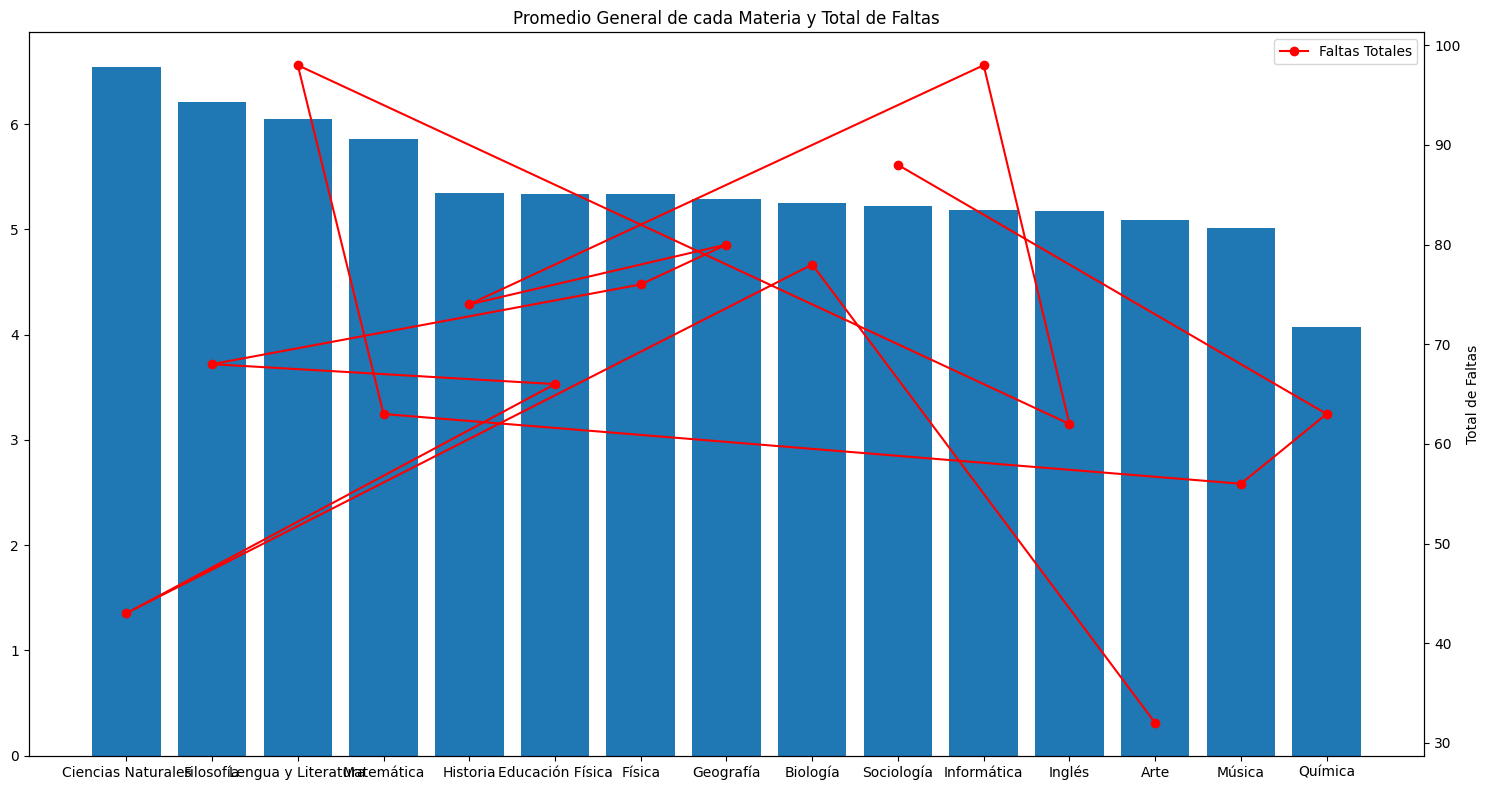

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_materias = df.groupby("Materia Escolar")[[
    "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"
]].mean().mean(axis=1).sort_values(ascending=False)

# Calcular el total de faltas por materia
faltas_materias = df.groupby("Materia Escolar")["Faltas a Clases"].sum()

# Crear el gráfico de barras con el promedio general de cada materia
plt.figure(figsize=(15, 8))
ax1 = plt.bar(promedio_materias.index, promedio_materias.values)

# Crear el eje secundario para las faltas
ax2 = plt.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o', label='Faltas Totales')

# Configurar los ejes y etiquetas
plt.xlabel("Materia Escolar")
plt.ylabel("Promedio General")
ax2.set_ylabel("Total de Faltas")
plt.title("Promedio General de cada Materia y Total de Faltas")
plt.xticks(rotation=90)

# Agregar leyenda para las faltas
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)